## load logistic and lorenz logs

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [39]:
# fig = plt.figure(figsize=(20,3.5))
# ax = plt.gca()

def plot_ts(pred):
    y_true, y_pred =pred
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(y_true[:100,seq_id],'g')
    ax.set_ylim([-20,20])
    ax = fig.add_subplot(2, 4, i+1)
    ax.plot(y_pred[:100,seq_id], 'r')
    ax.set_ylim([-20,20])
    ax.set_title(model)

### load logs for lorenz and print test error

In [12]:
time_stamp ="09-16-17-23-44-40"
exp='lorenz'
models =["RNN"] #'phased_lstm']#
hz_list= [128]
lr_list =[2]
steps =  [20,40,60,80,100]


import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d

def load_log(st, model):
    data_path = "/var/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+"st_"+str(st)
    print(data_path)
    f_pred= "predict.npy"
    f_err = "config.out"
    pred =  np.load(data_path+f_pred )
    with open(data_path+""+f_err,'r') as fstream:
        config = read_config(fstream)
    return config, pred

errs = np.ones((len(models), len(steps)))
i=0
j=0
for model in models:
    for step in steps:
        print('load model {:s}, step'.format(model,step))
        config, pred = load_log(step, model)
        print('train error:',config['train_error'],'valid error:',config['valid_error'],'test err:',config['test_error'])
        errs[i,j] =  config['test_error']
        j +=1
    i +=1


load model RNN, step
/var/tmp/tensorRNN/log/lorenz/09-16-17-23-44-40/RNN/st_20
train error: 0.00147697 valid error: 0.00226037 test err: 0.0356949
load model RNN, step
/var/tmp/tensorRNN/log/lorenz/09-16-17-23-44-40/RNN/st_40
train error: 0.0011381 valid error: 0.00443325 test err: 0.0453757
load model RNN, step
/var/tmp/tensorRNN/log/lorenz/09-16-17-23-44-40/RNN/st_60
train error: 0.000822631 valid error: 0.00111262 test err: 0.0509396
load model RNN, step
/var/tmp/tensorRNN/log/lorenz/09-16-17-23-44-40/RNN/st_80
train error: 0.00233249 valid error: 0.00389729 test err: 0.0537472
load model RNN, step
/var/tmp/tensorRNN/log/lorenz/09-16-17-23-44-40/RNN/st_100
train error: 0.000675414 valid error: 0.00158632 test err: 0.0762369


[[ 0.0356949  0.0453757  0.0509396  0.0537472  0.0762369]]


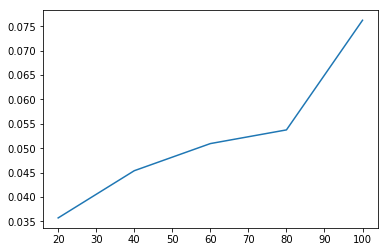

In [21]:
%matplotlib inline  
import matplotlib.pyplot as plt
print(errs)

plt.plot(steps,errs[0,:])
np.save('../result/rnn_lorenz.npy', errs[0,:])

In [3]:
np.set_printoptions(precision=3)
for k in range(len(models)):
    print(models[k])
    print(np.min(errs[:,:,k])) #row min--hidden size
    i,j = np.unravel_index(np.argmin(errs[:,:,k]),(4,4))
    print('hz', hz_list[i], 'lr', lr_list[j])

basic_rnn
0.290116404903
hz 256 lr 3
basic_lstm
0.312160490196
hz 32 lr 1
matrix_rnn
0.295931844584
hz 32 lr 1
tensor_rnn
0.275052446295
hz 256 lr 4
